<a href="https://colab.research.google.com/github/Kanishk877777/ML_Repo/blob/master/pump_dump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df =pd.read_csv('/content/drive/MyDrive/ETH_1H.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
...,...,...,...,...,...,...,...,...
34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213
34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450
34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567
34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075


In [139]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34497 entries, 0 to 34496
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unix Timestamp  34497 non-null  int64  
 1   Date            34497 non-null  object 
 2   Symbol          34497 non-null  object 
 3   Open            34497 non-null  float64
 4   High            34497 non-null  float64
 5   Low             34497 non-null  float64
 6   Close           34497 non-null  float64
 7   Volume          34497 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.1+ MB


In [140]:
df['Date']=pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [141]:
df.corr(numeric_only=True)

,Unix Timestamp,Open,High,Low,Close,Volume
Unix Timestamp,1.000000,-0.148268,-0.149557,-0.146748,-0.148357,-0.079237
Open,-0.148268,1.000000,0.999868,0.999809,0.999772,0.064437
High,-0.149557,0.999868,1.000000,0.999705,0.999875,0.066342
Low,-0.146748,0.999809,0.999705,1.000000,0.999839,0.061687
Close,-0.148357,0.999772,0.999875,0.999839,1.000000,0.064271
Volume,-0.079237,0.064437,0.066342,0.061687,0.064271,1.000000


In [142]:
df=df.sort_values('Date')
df.set_index('Date',inplace=True)
df

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2016-05-09 13:00:00,1462798800,ETHUSD,0.00,12.00,0.00,9.55,432.562115
2016-05-09 14:00:00,1462802400,ETHUSD,9.55,10.00,9.55,10.00,235.774075
2016-05-09 15:00:00,1462806000,ETHUSD,10.00,10.00,9.99,9.99,10.973567
2016-05-09 16:00:00,1462809600,ETHUSD,9.99,9.99,9.79,9.83,62.379450
2016-05-09 17:00:00,1462813200,ETHUSD,9.83,9.83,9.48,9.49,329.553213
...,...,...,...,...,...,...,...
2020-04-15 20:00:00,1586980800000,ETHUSD,157.10,158.10,156.87,158.04,144.262622
2020-04-15 21:00:00,1586984400000,ETHUSD,158.04,158.31,157.16,157.18,55.244131
2020-04-15 22:00:00,1586988000000,ETHUSD,157.18,157.30,155.32,155.81,106.337279


In [143]:
df=df.drop(['Symbol'],axis=1)
df

,Unix Timestamp,Open,High,Low,Close,Volume
Date,,,,,,
2016-05-09 13:00:00,1462798800,0.00,12.00,0.00,9.55,432.562115
2016-05-09 14:00:00,1462802400,9.55,10.00,9.55,10.00,235.774075
2016-05-09 15:00:00,1462806000,10.00,10.00,9.99,9.99,10.973567
2016-05-09 16:00:00,1462809600,9.99,9.99,9.79,9.83,62.379450
2016-05-09 17:00:00,1462813200,9.83,9.83,9.48,9.49,329.553213
...,...,...,...,...,...,...
2020-04-15 20:00:00,1586980800000,157.10,158.10,156.87,158.04,144.262622
2020-04-15 21:00:00,1586984400000,158.04,158.31,157.16,157.18,55.244131
2020-04-15 22:00:00,1586988000000,157.18,157.30,155.32,155.81,106.337279


<Axes: ylabel='Volume'>

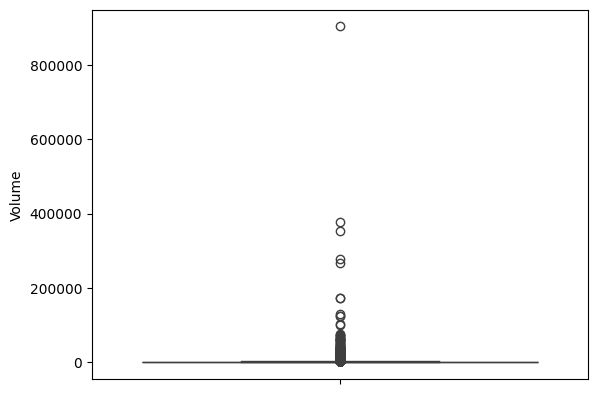

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['Volume'])

In [145]:
df['Volume'].max()


903102.6857

In [146]:
df=df.drop(['Unix Timestamp'],axis=1)
df

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213
...,...,...,...,...,...
2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622
2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131
2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279


/tmp/ipython-input-1212023132.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Volume']) # highly +ve skewed


<Axes: xlabel='Volume', ylabel='Density'>

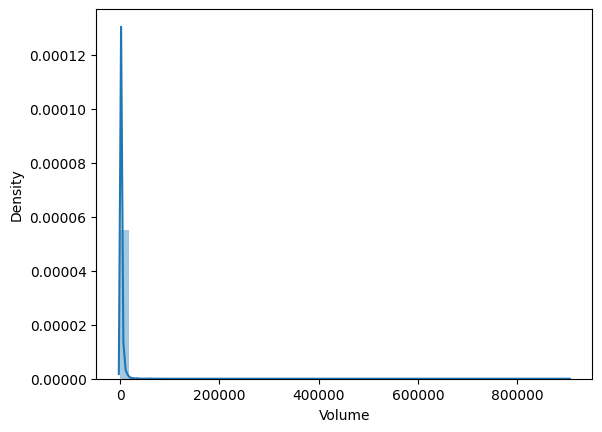

In [147]:
sns.distplot(df['Volume']) # highly +ve skewed

In [148]:
df['Return']=df['Close'].pct_change()*100
df

,Open,High,Low,Close,Volume,Return
Date,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,NaN
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,4.712042
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,-0.100000
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,-1.601602
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,-3.458800
...,...,...,...,...,...,...
2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622,0.598345
2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131,-0.544166
2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279,-0.871612


<Axes: >

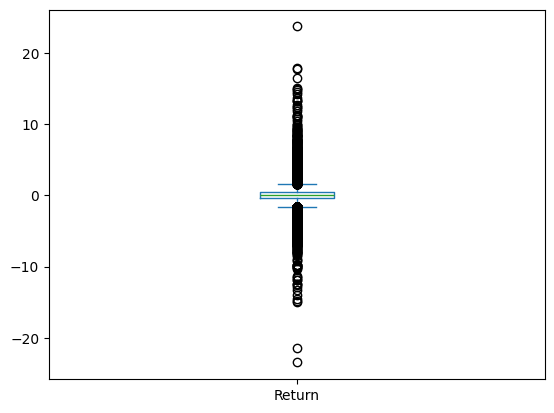

In [149]:
df['Return'].plot(kind='box')

In [150]:
df['Volatility'] = df['Return'].rolling(window=24).std()
df

,Open,High,Low,Close,Volume,Return,Volatility
Date,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,NaN,NaN
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,4.712042,NaN
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,-0.100000,NaN
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,-1.601602,NaN
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,-3.458800,NaN
...,...,...,...,...,...,...,...
2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622,0.598345,0.604787
2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131,-0.544166,0.613391
2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279,-0.871612,0.623680


In [151]:
df['Volatility'] = df['Return'].rolling(window=24).std()
df['Volume_Change'] = df['Volume'].pct_change()
df['Rolling_Mean'] = df['Close'].rolling(window=24).mean() #mean with past 24hours ka data bcuz window = 24
df['Rolling_Std']  = df['Close'].rolling(window=24).std() # std deviation of past 24 hours


df

,Open,High,Low,Close,Volume,Return,Volatility,Volume_Change,Rolling_Mean,Rolling_Std
Date,,,,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,NaN,NaN,NaN,NaN,NaN
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,4.712042,NaN,-0.454936,NaN,NaN
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,-0.100000,NaN,-0.953457,NaN,NaN
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,-1.601602,NaN,4.684519,NaN,NaN
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,-3.458800,NaN,4.283041,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622,0.598345,0.604787,-0.561986,158.397083,1.462203
2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131,-0.544166,0.613391,-0.617059,158.316250,1.474077
2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279,-0.871612,0.623680,0.924861,158.145000,1.517753


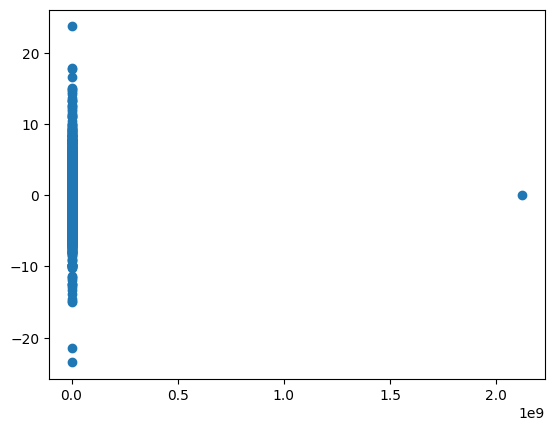

In [152]:
plt.scatter(df['Volume_Change'],df['Return'])

In [153]:
features=['Return','Volatility','Volume_Change','Rolling_Mean','Rolling_Std']
df[features] = df[features].fillna(0)

In [154]:
df

,Open,High,Low,Close,Volume,Return,Volatility,Volume_Change,Rolling_Mean,Rolling_Std
Date,,,,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,0.000000,0.000000,0.000000,0.000000,0.000000
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,4.712042,0.000000,-0.454936,0.000000,0.000000
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,-0.100000,0.000000,-0.953457,0.000000,0.000000
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,-1.601602,0.000000,4.684519,0.000000,0.000000
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,-3.458800,0.000000,4.283041,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622,0.598345,0.604787,-0.561986,158.397083,1.462203
2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131,-0.544166,0.613391,-0.617059,158.316250,1.474077
2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279,-0.871612,0.623680,0.924861,158.145000,1.517753


In [155]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
X = df[features].values
model = IsolationForest(n_estimators=200, contamination=0.02, random_state=42)
df['anomaly'] = model.fit_predict(X)
df['anomaly'] = df['anomaly'].map({1:0, -1:1})  #0 matlab normal trading 1 matlab possible pump and dump
df['anomaly'].value_counts()

,count
anomaly,
0,33807
1,690


In [156]:
df

,Open,High,Low,Close,Volume,Return,Volatility,Volume_Change,Rolling_Mean,Rolling_Std,anomaly
Date,,,,,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,0.000000,0.000000,0.000000,0.000000,0.000000,0
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,4.712042,0.000000,-0.454936,0.000000,0.000000,0
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,-0.100000,0.000000,-0.953457,0.000000,0.000000,0
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,-1.601602,0.000000,4.684519,0.000000,0.000000,0
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,-3.458800,0.000000,4.283041,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622,0.598345,0.604787,-0.561986,158.397083,1.462203,0
2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131,-0.544166,0.613391,-0.617059,158.316250,1.474077,0
2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279,-0.871612,0.623680,0.924861,158.145000,1.517753,0


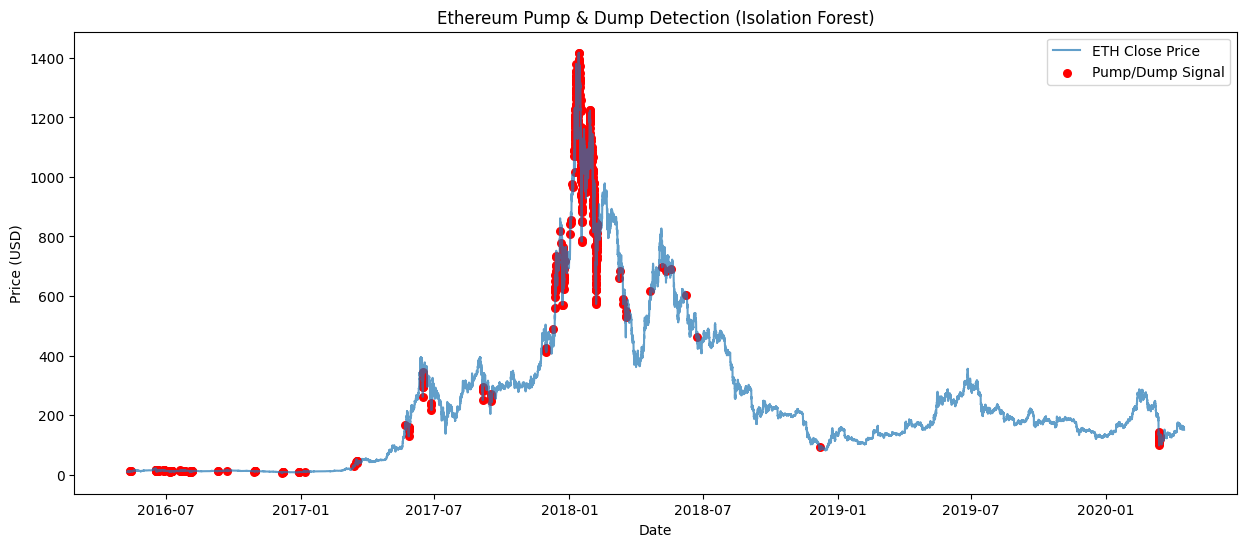

In [157]:


plt.figure(figsize=(15,6))
plt.plot(df.index, df['Close'], label="ETH Close Price", alpha=0.7)
plt.scatter(df.index[df['anomaly']==1], df['Close'][df['anomaly']==1],
            color='red', label="Pump/Dump Signal", s=30)
plt.title("Ethereum Pump & Dump Detection (Isolation Forest)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [158]:
df

,Open,High,Low,Close,Volume,Return,Volatility,Volume_Change,Rolling_Mean,Rolling_Std,anomaly
Date,,,,,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,0.000000,0.000000,0.000000,0.000000,0.000000,0
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,4.712042,0.000000,-0.454936,0.000000,0.000000,0
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,-0.100000,0.000000,-0.953457,0.000000,0.000000,0
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,-1.601602,0.000000,4.684519,0.000000,0.000000,0
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,-3.458800,0.000000,4.283041,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622,0.598345,0.604787,-0.561986,158.397083,1.462203,0
2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131,-0.544166,0.613391,-0.617059,158.316250,1.474077,0
2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279,-0.871612,0.623680,0.924861,158.145000,1.517753,0


In [162]:
df

,Open,High,Low,Close,Volume,Return,Volatility,Volume_Change,Rolling_Mean,Rolling_Std,anomaly
Date,,,,,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,0.000000,0.000000,0.000000,0.000000,0.000000,0
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,4.712042,0.000000,-0.454936,0.000000,0.000000,0
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,-0.100000,0.000000,-0.953457,0.000000,0.000000,0
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,-1.601602,0.000000,4.684519,0.000000,0.000000,0
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,-3.458800,0.000000,4.283041,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622,0.598345,0.604787,-0.561986,158.397083,1.462203,0
2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131,-0.544166,0.613391,-0.617059,158.316250,1.474077,0
2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279,-0.871612,0.623680,0.924861,158.145000,1.517753,0


In [164]:
new_df = df.reset_index()  # Moves the index (Date) into a column
new_df

,Date,Open,High,Low,Close,Volume,Return,Volatility,Volume_Change,Rolling_Mean,Rolling_Std,anomaly
0,2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,4.712042,0.000000,-0.454936,0.000000,0.000000,0
2,2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,-0.100000,0.000000,-0.953457,0.000000,0.000000,0
3,2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,-1.601602,0.000000,4.684519,0.000000,0.000000,0
4,2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,-3.458800,0.000000,4.283041,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34492,2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622,0.598345,0.604787,-0.561986,158.397083,1.462203,0
34493,2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131,-0.544166,0.613391,-0.617059,158.316250,1.474077,0
34494,2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279,-0.871612,0.623680,0.924861,158.145000,1.517753,0
34495,2020-04-15 23:00:00,155.81,155.81,151.39,152.94,4277.567299,-1.841987,0.704235,39.226413,157.908750,1.847660,0


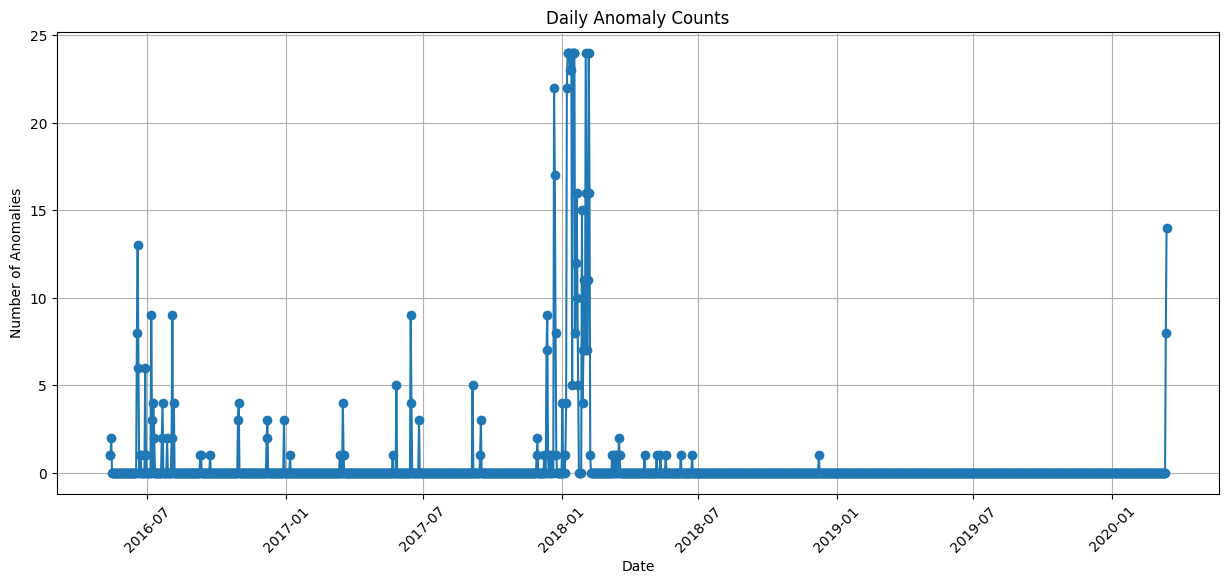

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(anomaly_counts.index, anomaly_counts.values, marker='o', linestyle='-')
plt.title("Daily Anomaly Counts")
plt.xlabel("Date")
plt.ylabel("Number of Anomalies")
plt.xticks(rotation=45)  # rotate date labels
plt.grid(True)
plt.show()
